In [12]:
# Neste trabalho venho correlacionar a Qualidade habitacional com outras variáveis,
# sendo elas PIB per capita, População, Educação e Mortalidade infantil.

# import das bibiliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt

# Determinando o objeto a ser analisado
data = pd.ExcelFile('/home/p3r3n3/Desktop/dados_IGM-CFA_2016.xlsx')

# Dicernindo o nome das camadas do arquivo 
data.sheet_names

# E observando as primeiras linhas da primeira camada
data.parse(sheet_name = 'Ranking', skiprows = None).head(10)

,Dados de Identificação/Demográficos,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,ÍNDICE CFA DE GESTÃO MUNICIPAL,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Cód Mun,Codigouf,Codigomunicipio,Estado,Nome,Capital (1=Sim;0=Não),Porte do Município,População 2016 (IBGE),Área da unidade territorial 2015 (km²) (IBGE C...,Densidade demográfica 2010 (hab/km²) (IBGE Cid...,...,Índice de Desempenho 2016,Colocação Nacional em Desempenho,Colocação Estadual em Desempenho,Municípios com índice \n(1=Sim; 0 Não)3,Status em Desempenho,Variável do outlier,IGM - 2016,Colocação no IGM,Colocação Estadual no IGM,Municípios com índice \n(1=Sim; 0 Não)4
1,3520400,35,20400,SP,ILHABELA,0,Pequeno porte 2,32782,347.52,81.1,...,0.774718,138º,70º,1,Com dados,NaN,0.766614,1º,1º,1
2,3547304,35,47304,SP,SANTANA DE PARNAIBA,0,Grande porte,129261,179.95,604.7,...,0.789834,74º,39º,1,Com dados,NaN,0.758648,2º,2º,1
3,4202453,42,2453,SC,BOMBINHAS,0,Pequeno porte 1,18052,35.92,398,...,0.770482,161º,31º,1,Com dados,NaN,0.758456,3º,1º,1
4,3548708,35,48708,SP,SAO BERNARDO DO CAMPO,0,Grande porte,822242,409.53,1869.4,...,0.739872,428º,187º,1,Com dados,NaN,0.755808,4º,3º,1
5,5300108,53,108,DF,BRASILIA,1,Grande porte,2977216,5780,444.7,...,0.759216,247º,1º,1,Com dados,NaN,0.735655,5º,1º,1
6,3548500,35,48500,SP,SANTOS,0,Grande porte,434359,280.67,1494.3,...,0.802162,38º,22º,1,Com dados,NaN,0.731084,6º,4º,1
7,3520509,35,20509,SP,INDAIATUBA,0,Grande porte,235367,311.55,646.1,...,0.751076,317º,138º,1,Com dados,NaN,0.727486,7º,5º,1
8,4309100,43,9100,RS,GRAMADO,0,Pequeno porte 2,34832,237.83,135.7,...,0.719539,708º,101º,1,Com dados,NaN,0.726541,8º,1º,1
9,4202008,42,2008,SC,BALNEARIO CAMBORIU,0,Grande porte,131727,46.24,2337.7,...,0.806139,31º,5º,1,Com dados,NaN,0.725932,9º,2º,1


In [6]:
# A seguir vamos substituir o nome das variáveis de 'Unnamed (n)' para seus nomes.
tabnames = data.sheet_names
i = 0
df = data.parse(sheet_name = tabnames[i],skiprows = 1)
df.head(10)

,Cód Mun,Codigouf,Codigomunicipio,Estado,Nome,Capital (1=Sim;0=Não),Porte do Município,População 2016 (IBGE),Área da unidade territorial 2015 (km²) (IBGE Cidades),Densidade demográfica 2010 (hab/km²) (IBGE Cidades),...,Índice de Desempenho 2016,Colocação Nacional em Desempenho,Colocação Estadual em Desempenho,Municípios com índice (1=Sim; 0 Não)3,Status em Desempenho,Variável do outlier,IGM - 2016,Colocação no IGM,Colocação Estadual no IGM,Municípios com índice (1=Sim; 0 Não)4
0,3520400,35,20400,SP,ILHABELA,0,Pequeno porte 2,32782,347.52,81.1,...,0.774718,138º,70º,1,Com dados,NaN,0.766614,1º,1º,1
1,3547304,35,47304,SP,SANTANA DE PARNAIBA,0,Grande porte,129261,179.95,604.7,...,0.789834,74º,39º,1,Com dados,NaN,0.758648,2º,2º,1
2,4202453,42,2453,SC,BOMBINHAS,0,Pequeno porte 1,18052,35.92,398.0,...,0.770482,161º,31º,1,Com dados,NaN,0.758456,3º,1º,1
3,3548708,35,48708,SP,SAO BERNARDO DO CAMPO,0,Grande porte,822242,409.53,1869.4,...,0.739872,428º,187º,1,Com dados,NaN,0.755808,4º,3º,1
4,5300108,53,108,DF,BRASILIA,1,Grande porte,2977216,5780.00,444.7,...,0.759216,247º,1º,1,Com dados,NaN,0.735655,5º,1º,1
5,3548500,35,48500,SP,SANTOS,0,Grande porte,434359,280.67,1494.3,...,0.802162,38º,22º,1,Com dados,NaN,0.731084,6º,4º,1
6,3520509,35,20509,SP,INDAIATUBA,0,Grande porte,235367,311.55,646.1,...,0.751076,317º,138º,1,Com dados,NaN,0.727486,7º,5º,1
7,4309100,43,9100,RS,GRAMADO,0,Pequeno porte 2,34832,237.83,135.7,...,0.719539,708º,101º,1,Com dados,NaN,0.726541,8º,1º,1
8,4202008,42,2008,SC,BALNEARIO CAMBORIU,0,Grande porte,131727,46.24,2337.7,...,0.806139,31º,5º,1,Com dados,NaN,0.725932,9º,2º,1
9,4214805,42,14805,SC,RIO DO SUL,0,Médio porte,68217,260.97,235.1,...,0.779213,108º,17º,1,Com dados,NaN,0.720390,10º,3º,1


In [7]:
# Uma pausa para vermos como está o dataframe (df)
df.info()
# Com essa informação podemos ver que está tudo bem com o nosso arquivo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 49 columns):
Cód Mun                                                  5570 non-null int64
Codigouf                                                 5570 non-null int64
Codigomunicipio                                          5570 non-null int64
Estado                                                   5570 non-null object
Nome                                                     5570 non-null object
Capital (1=Sim;0=Não)                                    5570 non-null int64
Porte do Município                                       5570 non-null object
População 2016 (IBGE)                                    5570 non-null int64
Área da unidade territorial 2015 (km²) (IBGE Cidades)    5570 non-null float64
Densidade demográfica 2010 (hab/km²) (IBGE Cidades)      5566 non-null float64
PIB 2013 -  A preços correntes (1000 R$) (IBGE)          5570 non-null float64
PIB per capita (R$) 2013 (IBGE)      

In [10]:
# Criando um novo data frame com as informações que serão analisadas.
DF = pd.DataFrame(df, columns=['Estado','Nome','População 2016 (IBGE)','PIB per capita (R$) 2013 (IBGE)','Qualidade habitacional','Colocação Nacional em Gastos e Finanças Públicas','Educação','Mortalidade infantil'])
DF

,Estado,Nome,População 2016 (IBGE),PIB per capita (R$) 2013 (IBGE),Qualidade habitacional,Colocação Nacional em Gastos e Finanças Públicas,Educação,Mortalidade infantil
0,SP,ILHABELA,32782,105112.856650,0.857383,1º,0.801973,0.883229
1,SP,SANTANA DE PARNAIBA,129261,60939.874923,0.891729,6º,0.761753,0.810350
2,SC,BOMBINHAS,18052,23135.143065,0.977771,13º,0.800522,0.929287
3,SP,SAO BERNARDO DO CAMPO,822242,59149.804020,0.935952,89º,0.760839,0.882146
4,DF,BRASILIA,2977216,62859.431835,0.937236,20º,0.618705,0.850447
5,SP,SANTOS,434359,44478.217848,0.961338,88º,0.846209,0.858846
6,SP,INDAIATUBA,235367,46404.743151,0.958789,96º,0.742765,0.867787
7,RS,GRAMADO,34832,39316.635587,0.919860,26º,0.545643,0.942834
8,SC,BALNEARIO CAMBORIU,131727,32105.775747,0.975638,83º,0.775912,0.994310
9,SC,RIO DO SUL,68217,31297.874840,0.969826,329º,0.877108,0.986183


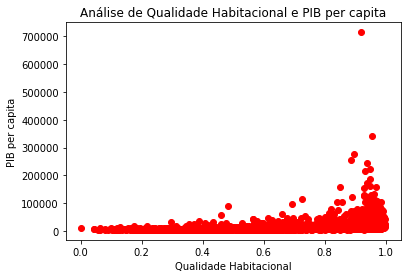

In [44]:
# Plotando os números de Qualidade habitacional e PIB per capita 
plt.plot(DF['Qualidade habitacional'], DF['PIB per capita (R$) 2013 (IBGE)'], 'ro')
plt.title('Análise de Qualidade Habitacional e PIB per capita')
plt.ylabel('PIB per capita')
plt.xlabel('Qualidade Habitacional')
plt.show()

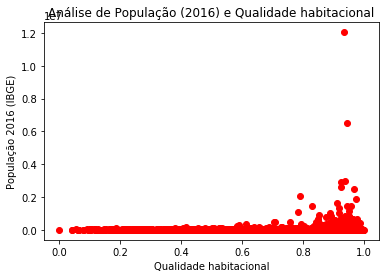

In [58]:
# Gráfico referente a população e qualidade habitacional
plt.plot(DF['Qualidade habitacional'], DF['População 2016 (IBGE)'], 'ro')
plt.title('Análise de População (2016) e Qualidade habitacional')
plt.ylabel('População 2016 (IBGE)')
plt.xlabel('Qualidade habitacional')
plt.show()

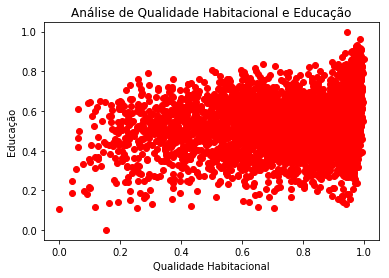

In [59]:
# Análise Educação e Qualidade habitacional
plt.plot(DF['Qualidade habitacional'], DF['Educação'], 'ro')
plt.title('Análise de Qualidade Habitacional e Educação')
plt.ylabel('Educação')
plt.xlabel('Qualidade Habitacional')
plt.show()

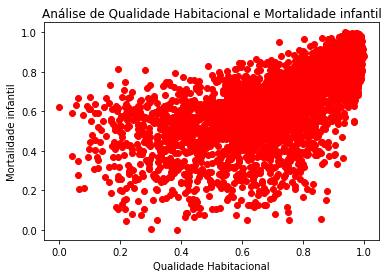

In [60]:
# Qualidade habitacional e mortalidade infantil
plt.plot(DF['Qualidade habitacional'], DF['Mortalidade infantil'], 'ro')
plt.title('Análise de Qualidade Habitacional e Mortalidade infantil')
plt.ylabel('Mortalidade infantil')
plt.xlabel('Qualidade Habitacional')
plt.show()

In [61]:
# Portanto, podemos compreender que existe correlação entre a Qualidade habitacional e PIB per capita e Educação.
# Entretanto, não conseguimos inferir o mesmo sobre Qualidade habitacional e Educação e Mortalidade Infantil.
# Podemos, porém, dizer que a Qualidade habitacional e a Mortalidade infantil aumentam em conjunto. Sem correlação entre si

print('Fim do programa.')
print('\n','Obrigado pela atenção.')

Fim do programa.

 Obrigado pela atenção.
